# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `16_ald_diff_analysis`

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)

In [2]:
# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters

In [3]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [4]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


In [5]:
params = vaep.nb.get_params(args, globals=globals())
params

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


{'folder_experiment': 'runs/alzheimer_study',
 'target': 'AD',
 'model_key': 'DAE',
 'baseline': 'PI',
 'out_folder': 'diff_analysis',
 'disease_ontology': 10652,
 'annotaitons_gene_col': 'None'}

In [6]:
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args

root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'target': 'AD'}

In [7]:
files_in = {
    'freq_features_observed.csv': args.folder_experiment / 'freq_features_observed.csv',
}
files_in

{'freq_features_observed.csv': PosixPath('runs/alzheimer_study/freq_features_observed.csv')}

## Excel file for exports

In [8]:
files_out = dict()

In [9]:
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
fname

PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx')

## Load scores

In [10]:
[x for x in args.scores_folder.iterdir() if 'scores' in str(x)]

[PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_None.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_None.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_PI.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_Median.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_RF.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_TRKNN.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_VAE.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_DAE.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_RF.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_DAE.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_QRILC.ht

In [11]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.401  1  0.728 0.395 0.004   
                             age       0.079  1  0.143 0.706 0.001   
                             Kiel      1.874  1  3.399 0.067 0.017   
                             Magdeburg 4.527  1  8.211 0.005 0.041   
                             Sweden    7.021  1 12.734 0.000 0.063   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.103  1  0.104 0.747 0.001   
                             age       1.285  1  1.292 0.257 0.007   
                             Kiel      0.004  1  0.004 0.950 0.000   
                             Magdeburg 2.678  1  2.693 0.102 0.014   
                             Sweden    9.290  1  9.343 0.003 0.047   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.404  0.554    False  
                             age               0.151  0.811    False  
                             Kiel              1.175  0.154    False  
                             Magdeburg         2.334  0.018     True  
                             Sweden            3.343  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.126  0.840    False  
                             age               0.590  0.412    False  
                             Kiel              0.022  0.973    False  
                             Magdeburg         0.990  0.214    False  
                             Sweden            2.592  0.011     True  

[7105 rows x 8 columns]

In [12]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.109  1  7.954 0.005 0.040   
                             age        0.006  1  0.046 0.831 0.000   
                             Kiel       0.281  1  2.018 0.157 0.010   
                             Magdeburg  0.475  1  3.407 0.066 0.018   
                             Sweden     1.722  1 12.348 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.406  1  3.943 0.048 0.020   
                             age        0.882  1  1.445 0.231 0.008   
                             Kiel       3.678  1  6.027 0.015 0.031   
                             Magdeburg  3.490  1  5.721 0.018 0.029   
                             Sweden    23.330  1 38.238 0.000 0.167   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.275  0.015     True  
                             age               0.080  0.888    False  
                             Kiel              0.804  0.258    False  
                             Magdeburg         1.177  0.129    False  
                             Sweden            3.259  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.314  0.099    False  
                             age               0.637  0.348    False  
                             Kiel              1.824  0.037     True  
                             Magdeburg         1.751  0.043     True  
                             Sweden            8.430  0.000     True  

[7105 rows x 8 columns]

In [13]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.401  1  0.728 0.395 0.004   
                             age       0.079  1  0.143 0.706 0.001   
                             Kiel      1.874  1  3.399 0.067 0.017   
                             Magdeburg 4.527  1  8.211 0.005 0.041   
                             Sweden    7.021  1 12.734 0.000 0.063   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.103  1  0.104 0.747 0.001   
                             age       1.285  1  1.292 0.257 0.007   
                             Kiel      0.004  1  0.004 0.950 0.000   
                             Magdeburg 2.678  1  2.693 0.102 0.014   
                             Sweden    9.290  1  9.343 0.003 0.047   

model                                                                   DAE  \
var                                    -Log10 pvalue qvalue rejected     SS   
protein groups               Source                                           
A0A024QZX5;A0A087X1N8;P35237 AD                0.404  0.554    False  1.109   
                             age               0.151  0.811    False  0.006   
                             Kiel              1.175  0.154    False  0.281   
                             Magdeburg         2.334  0.018     True  0.475   
                             Sweden            3.343  0.003     True  1.722   
...                                              ...    ...      ...    ...   
S4R3U6                       AD                0.126  0.840    False  2.406   
                             age               0.590  0.412    False  0.882   
                             Kiel              0.022  0.973    False  3.678   
                             Magdeburg         0.990  0.214    False  3.490   
                             Sweden            2.592  0.011     True 23.330   

model                                                                       \
var                                    DF      F p-unc   np2 -Log10 pvalue   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD         1  7.954 0.005 0.040         2.275   
                             age        1  0.046 0.831 0.000         0.080   
                             Kiel       1  2.018 0.157 0.010         0.804   
                             Magdeburg  1  3.407 0.066 0.018         1.177   
                             Sweden     1 12.348 0.001 0.061         3.259   
...                                    ..    ...   ...   ...           ...   
S4R3U6                       AD         1  3.943 0.048 0.020         1.314   
                             age        1  1.445 0.231 0.008         0.637   
                             Kiel       1  6.027 0.015 0.031         1.824   
                             Magdeburg  1  5.721 0.018 0.029         1.751   
                             Sweden     1 38.238 0.000 0.167         8.430   

model                                                   
var                                    qvalue rejected  
protein groups               Source                     
A0A024QZX5;A0A087X1N8;P35237 AD         0.015     True  
                             age        0.888    False  
                             Kiel       0.258    False  
                             Magdeburg  0.129    False  
                             Sweden     0.002     True  
...                                       ...      ...  
S4R3U6                       AD         0.099    False  
                             age        0.348    False  
                             Kiel       0.037     True  
                             Magdeburg  0.043     True  
                             Sweden     0.000     True  

[7105 rows x 16 colu

In [14]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'DAE': 'DAE'}

In [15]:
scores.describe()

model        PI                                                        \
var          SS        DF         F     p-unc       np2 -Log10 pvalue   
count 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000     7,105.000   
mean     10.301     1.000    12.387     0.259     0.043         2.477   
std      64.140     0.000    85.067     0.302     0.084         5.330   
min       0.000     1.000     0.000     0.000     0.000         0.000   
25%       0.319     1.000     0.554     0.004     0.003         0.339   
50%       1.606     1.000     2.429     0.121     0.013         0.918   
75%       6.011     1.000     8.583     0.458     0.043         2.419   
max   3,997.313     1.000 6,226.770     0.999     0.970       146.999   

model                 DAE                                          \
var      qvalue        SS        DF         F     p-unc       np2   
count 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000   
mean      0.335     5.923     1.000    16.542     0.222     0.058   
std       0.329    23.685     0.000    49.293     0.294     0.102   
min       0.000     0.000     1.000     0.000     0.000     0.000   
25%       0.015     0.196     1.000     0.750     0.000     0.004   
50%       0.241     1.061     1.000     3.640     0.058     0.019   
75%       0.610     3.908     1.000    12.891     0.388     0.063   
max       0.999   926.703     1.000 1,319.631     1.000     0.874   

model                          
var   -Log10 pvalue    qvalue  
count     7,105.000 7,105.000  
mean          3.327     0.274  
std           6.258     0.320  
min           0.000     0.000  
25%           0.412     0.002  
50%           1.237     0.116  
75%           3.377     0.517  
max          86.981     1.000

In [16]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI           \
var                                                          SS DF     F   
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD     0.401  1 0.728   
A0A024R0T9;K7ER74;P02655                           AD     3.139  1 3.828   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     2.573  1 2.864   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.081  1 0.397   
A0A075B6H7                                         AD     3.858  1 0.953   
...                                                         ... ..   ...   
Q9Y6R7                                             AD     0.675  1 1.850   
Q9Y6X5                                             AD     3.162  1 3.505   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.973  1 3.028   
Q9Y6Y9                                             AD     1.101  1 1.407   
S4R3U6                                             AD     0.103  1 0.104   

model                                                                  \
var                                                       p-unc   np2   
protein groups                                     Source               
A0A024QZX5;A0A087X1N8;P35237                       AD     0.395 0.004   
A0A024R0T9;K7ER74;P02655                           AD     0.052 0.020   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.092 0.015   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.530 0.002   
A0A075B6H7                                         AD     0.330 0.005   
...                                                         ...   ...   
Q9Y6R7                                             AD     0.175 0.010   
Q9Y6X5                                             AD     0.063 0.018   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083 0.016   
Q9Y6Y9                                             AD     0.237 0.007   
S4R3U6                                             AD     0.747 0.001   

model                                                                    \
var                                                       -Log10 pvalue   
protein groups                                     Source                 
A0A024QZX5;A0A087X1N8;P35237                       AD             0.404   
A0A024R0T9;K7ER74;P02655                           AD             1.285   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD             1.035   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD             0.276   
A0A075B6H7                                         AD             0.481   
...                                                                 ...   
Q9Y6R7                                             AD             0.756   
Q9Y6X5                                             AD             1.203   
Q9Y6Y8;Q9Y6Y8-2                                    AD             1.079   
Q9Y6Y9                                             AD             0.625   
S4R3U6                                             AD             0.126   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.554    False   
A0A024R0T9;K7ER74;P02655                           AD      0.126    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.196    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.671    False   
A0A075B6H7                                         AD      0.492    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.314    False   
Q9Y6X5                                             AD      0.146    False   
Q9Y6Y8;Q9Y6Y8-

In [17]:
scores.describe()

model        PI                                                        \
var          SS        DF         F     p-unc       np2 -Log10 pvalue   
count 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000     1,421.000   
mean      3.635     1.000     4.828     0.248     0.023         1.400   
std       6.200     0.000     7.469     0.288     0.032         1.612   
min       0.000     1.000     0.000     0.000     0.000         0.001   
25%       0.407     1.000     0.648     0.012     0.003         0.375   
50%       1.531     1.000     2.410     0.122     0.012         0.913   
75%       4.061     1.000     6.378     0.422     0.032         1.908   
max      64.644     1.000   128.571     0.999     0.402        22.392   

model                 DAE                                          \
var      qvalue        SS        DF         F     p-unc       np2   
count 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000   
mean      0.331     1.958     1.000     5.641     0.244     0.027   
std       0.312     3.753     0.000     8.658     0.297     0.036   
min       0.000     0.000     1.000     0.000     0.000     0.000   
25%       0.040     0.168     1.000     0.618     0.008     0.003   
50%       0.243     0.783     1.000     2.863     0.092     0.015   
75%       0.580     2.302     1.000     7.122     0.433     0.036   
max       0.999    58.749     1.000   133.416     0.997     0.411   

model                          
var   -Log10 pvalue    qvalue  
count     1,421.000 1,421.000  
mean          1.577     0.303  
std           1.847     0.319  
min           0.001     0.000  
25%           0.364     0.023  
50%           1.035     0.169  
75%           2.082     0.562  
max          23.021     0.998

In [18]:
scores.describe(include=['bool', 'O'])

model,PI,DAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1036,943


## Load frequencies of observed features

In [19]:
freq_feat = pd.read_csv(files_in['freq_features_observed.csv'], index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [20]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                      SS DF     F p-unc   np2   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.401  1 0.728 0.395 0.004   
A0A024R0T9;K7ER74;P02655                           3.139  1 3.828 0.052 0.020   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 2.573  1 2.864 0.092 0.015   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.081  1 0.397 0.530 0.002   
A0A075B6H7                                         3.858  1 0.953 0.330 0.005   
...                                                  ... ..   ...   ...   ...   
Q9Y6R7                                             0.675  1 1.850 0.175 0.010   
Q9Y6X5                                             3.162  1 3.505 0.063 0.018   
Q9Y6Y8;Q9Y6Y8-2                                    0.973  1 3.028 0.083 0.016   
Q9Y6Y9                                             1.101  1 1.407 0.237 0.007   
S4R3U6                                             0.103  1 0.104 0.747 0.001   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.404  0.554   
A0A024R0T9;K7ER74;P02655                                   1.285  0.126   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.035  0.196   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.276  0.671   
A0A075B6H7                                                 0.481  0.492   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.314   
Q9Y6X5                                                     1.203  0.146   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.625  0.389   
S4R3U6                                                     0.126  0.840   

                                                              DAE           \
                                                   rejected    SS DF     F   
protein groups                                                               
A0A024QZX5;A0A087X1N8;P35237                          False 1.109  1 7.954   
A0A024R0T9;K7ER74;P02655                              False 2.826  1 4.598   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.094  1 0.770   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.177  1 1.278   
A0A075B6H7                                            False 6.399  1 6.874   
...                                                     ...   ... ..   ...   
Q9Y6R7                                                False 0.675  1 1.850   
Q9Y6X5                                                False 0.257  1 0.781   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.973  1 3.028   
Q9Y6Y9                                                False 0.027  1 0.023   
S4R3U6                                                False 2.406  1 3.943   

                                                                              \
                                                   p-unc   np2 -Log10 pvalue   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237                       0.005 0.040         2.275   
A0A024R0T9;K7ER74;P02655                           0.033 0.024         1.478   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.381 0.004         0.419   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.260 0.007         0.585   
A0A075B6H7                                         0.009 0.035         2.024   
...                                                  ...   ...           ...   
Q9Y6R7                                             0.17

In [21]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - DAE (no)    886
PI (yes) - DAE (yes)   328
PI (no)  - DAE (yes)   150
PI (yes) - DAE (no)     57
Name: count, dtype: int64

In [22]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)

scores_common.loc[mask_different]

PI                                            \
                                 SS DF     F p-unc   np2 -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237  0.401  1 0.728 0.395 0.004         0.404  0.554   
A0A075B6H7                    3.858  1 0.953 0.330 0.005         0.481  0.492   
A0A075B6I0                    8.273  1 5.438 0.021 0.028         1.683  0.062   
A0A075B6Q5                    0.233  1 0.062 0.804 0.000         0.095  0.883   
A0A075B6R2                    3.481  1 1.088 0.298 0.006         0.526  0.460   
...                             ... ..   ...   ...   ...           ...    ...   
Q9UJ14                        2.844  1 5.536 0.020 0.028         1.707  0.059   
Q9UKB5                       17.412  1 6.468 0.012 0.033         1.929  0.039   
Q9UP79                        4.594  1 2.455 0.119 0.013         0.925  0.238   
Q9UQ52                        1.953  1 3.879 0.050 0.020         1.298  0.123   
Q9Y6C2                        0.399  1 0.351 0.554 0.002         0.256  0.691   

                                         DAE                        \
                             rejected     SS DF      F p-unc   np2   
protein groups                                                       
A0A024QZX5;A0A087X1N8;P35237    False  1.109  1  7.954 0.005 0.040   
A0A075B6H7                      False  6.399  1  6.874 0.009 0.035   
A0A075B6I0                      False 10.310  1 11.872 0.001 0.059   
A0A075B6Q5                      False  2.878  1  6.974 0.009 0.035   
A0A075B6R2                      False  7.014  1 12.621 0.000 0.062   
...                               ...    ... ..    ...   ...   ...   
Q9UJ14                          False  1.405  1  5.478 0.020 0.028   
Q9UKB5                           True  0.594  1  2.132 0.146 0.011   
Q9UP79                          False  2.652  1 17.807 0.000 0.085   
Q9UQ52                          False  1.852  1 12.661 0.000 0.062   
Q9Y6C2                          False  4.542  1  9.819 0.002 0.049   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.275  0.015     True       186  
A0A075B6H7                           2.024  0.025     True        91  
A0A075B6I0                           3.155  0.003     True       194  
A0A075B6Q5                           2.048  0.024     True       104  
A0A075B6R2                           3.318  0.002     True       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.693  0.048     True       169  
Q9UKB5                               0.836  0.243    False       148  
Q9UP79                               4.423  0.000     True       135  
Q9UQ52                               3.327  0.002     True       188  
Q9Y6C2                               2.699  0.007     True       119  

[207 rows x 17 columns]

In [23]:
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)

In [24]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,DAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.554,0.015,186,PI (no) - DAE (yes)
A0A024R0T9;K7ER74;P02655,0.126,0.073,195,PI (no) - DAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.196,0.511,174,PI (no) - DAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.671,0.381,196,PI (no) - DAE (no)
A0A075B6H7,0.492,0.025,91,PI (no) - DAE (yes)
...,...,...,...,...
Q9Y6R7,0.314,0.281,197,PI (no) - DAE (no)
Q9Y6X5,0.146,0.507,173,PI (no) - DAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.156,197,PI (no) - DAE (no)


## Plot of intensities for most extreme example

In [25]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,DAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.001,0.972,66,PI (yes) - DAE (no),0.970
Q8N9I0,0.969,0.002,141,PI (no) - DAE (yes),0.968
P52758,0.005,0.971,119,PI (yes) - DAE (no),0.967
O00187;O00187-2,0.990,0.026,119,PI (no) - DAE (yes),0.963
E5RJY1;E7ESM1;Q92597;Q92597-2;Q92597-3,0.969,0.006,60,PI (no) - DAE (yes),0.963
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.058,0.046,197,PI (no) - DAE (yes),0.011
Q9NX62,0.056,0.045,197,PI (no) - DAE (yes),0.011
P00740;P00740-2,0.053,0.042,197,PI (no) - DAE (yes),0.011


## Differences plotted

- first only using created annotations

fontTools.subset - INFO     maxp pruned


fontTools.subset - INFO     cmap pruned


fontTools.subset - INFO     kern dropped


fontTools.subset - INFO     post pruned


fontTools.subset - INFO     FFTM dropped


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     Added gid0 to subset


fontTools.subset - INFO     Added first four glyphs to subset


fontTools.subset - INFO     Closing glyph list over 'MATH': 31 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'I', 'P', 'a', 'e', 'eight', 'f', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 39, 40, 44, 51, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92]


fontTools.subset - INFO     Closed glyph list over 'MATH': 37 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'I', 'P', 'a', 'e', 'eight', 'f', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 39, 40, 44, 51, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closing glyph list over 'GSUB': 37 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'I', 'P', 'a', 'e', 'eight', 'f', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 39, 40, 44, 51, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closed glyph list over 'GSUB': 40 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'I', 'P', 'a', 'e', 'eight', 'f', 'fl', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 39, 40, 44, 51, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5040, 5042]


fontTools.subset - INFO     Closing glyph list over 'glyf': 40 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'I', 'P', 'a', 'e', 'eight', 'f', 'fl', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 39, 40, 44, 51, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5040, 5042]


fontTools.subset - INFO     Closed glyph list over 'glyf': 40 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'I', 'P', 'a', 'e', 'eight', 'f', 'fl', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 39, 40, 44, 51, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5040, 5042]


fontTools.subset - INFO     Retaining 40 glyphs


fontTools.subset - INFO     head subsetting not needed


fontTools.subset - INFO     hhea subsetting not needed


fontTools.subset - INFO     maxp subsetting not needed


fontTools.subset - INFO     OS/2 subsetting not needed


fontTools.subset - INFO     hmtx subsetted


fontTools.subset - INFO     cmap subsetted


fontTools.subset - INFO     fpgm subsetting not needed


fontTools.subset - INFO     prep subsetting not needed


fontTools.subset - INFO     cvt  subsetting not needed


fontTools.subset - INFO     loca subsetting not needed


fontTools.subset - INFO     post subsetted


fontTools.subset - INFO     gasp subsetting not needed


fontTools.subset - INFO     MATH subsetted


fontTools.subset - INFO     GDEF subsetted


fontTools.subset - INFO     GPOS subsetted


fontTools.subset - INFO     GSUB subsetted


fontTools.subset - INFO     name subsetting not needed


fontTools.subset - INFO     glyf subsetted


fontTools.subset - INFO     head pruned


fontTools.subset - INFO     OS/2 Unicode ranges pruned: [0]


fontTools.subset - INFO     OS/2 CodePage ranges pruned: [0]


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     GDEF pruned


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     name pruned


vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


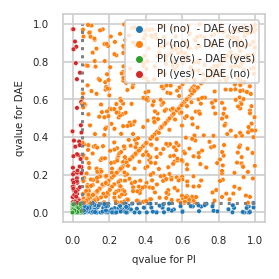

In [26]:
figsize = (2, 2)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- showing how many features were measured ("observed")

fontTools.subset - INFO     maxp pruned


fontTools.subset - INFO     cmap pruned


fontTools.subset - INFO     kern dropped


fontTools.subset - INFO     post pruned


fontTools.subset - INFO     FFTM dropped


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     Added gid0 to subset


fontTools.subset - INFO     Added first four glyphs to subset


fontTools.subset - INFO     Closing glyph list over 'MATH': 39 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92]


fontTools.subset - INFO     Closed glyph list over 'MATH': 45 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closing glyph list over 'GSUB': 45 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closed glyph list over 'GSUB': 50 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closing glyph list over 'glyf': 50 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closed glyph list over 'glyf': 50 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Retaining 50 glyphs


fontTools.subset - INFO     head subsetting not needed


fontTools.subset - INFO     hhea subsetting not needed


fontTools.subset - INFO     maxp subsetting not needed


fontTools.subset - INFO     OS/2 subsetting not needed


fontTools.subset - INFO     hmtx subsetted


fontTools.subset - INFO     cmap subsetted


fontTools.subset - INFO     fpgm subsetting not needed


fontTools.subset - INFO     prep subsetting not needed


fontTools.subset - INFO     cvt  subsetting not needed


fontTools.subset - INFO     loca subsetting not needed


fontTools.subset - INFO     post subsetted


fontTools.subset - INFO     gasp subsetting not needed


fontTools.subset - INFO     MATH subsetted


fontTools.subset - INFO     GDEF subsetted


fontTools.subset - INFO     GPOS subsetted


fontTools.subset - INFO     GSUB subsetted


fontTools.subset - INFO     name subsetting not needed


fontTools.subset - INFO     glyf subsetted


fontTools.subset - INFO     head pruned


fontTools.subset - INFO     OS/2 Unicode ranges pruned: [0]


fontTools.subset - INFO     OS/2 CodePage ranges pruned: [0]


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     GDEF pruned


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     name pruned


vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


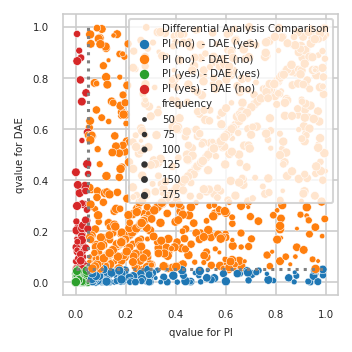

In [27]:
figsize = (2.5, 2.5)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [28]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat)
                         )
    display(scores_model_only)
else:
    scores_model_only = None

In [29]:
if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

## DISEASES DB lookup

In [30]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [31]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()

In [ ]:
files_out